In [1]:
import pandas
import os
import numpy as np

from pprint import pprint
from matplotlib import pyplot as plt

In [2]:
dirname = "odg_pf"

curve = []
obs1 = []
obs2 = []
racing = []
sprint= []

for (dirpath, dirnames, filenames) in os.walk(dirname):
    if '.ipynb_checkpoints' in dirpath:
        continue
    if 'curve' in dirpath:
        curve += [os.path.join(dirpath, file) for file in filenames]
    if 'obs1' in dirpath:
        obs1 += [os.path.join(dirpath, file) for file in filenames]
    if 'obs2' in dirpath:
        obs2 += [os.path.join(dirpath, file) for file in filenames]
    if 'racing' in dirpath:
        racing += [os.path.join(dirpath, file) for file in filenames]
    if 'sprint' in dirpath:
        sprint += [os.path.join(dirpath, file) for file in filenames]
        

In [7]:
def load_df(dirlist):
    dflist = []
    for data in dirlist:
        df = pandas.read_csv(data)
        df['exe_time'] = df['exe_time'] * 1000
        dflist.append(df)
    #     print(df)
    return dflist

In [14]:
# calculation mean value each csv file
def mean_list_calc(dflist):
    mean_list = []
    for i in range(len(dflist)):
        df = dflist[i]
        means_data = {}

    #     last_data = df.iloc[-1]
    #     print(last_data['time'])

    #     plt.title(df_name)
    #     plt.grid()
    #     plt.xlabel("Interval")
    #     plt.ylabel("milliseconds")
    #     plt.rcParams['figure.figsize'] = [12, 8]
    #     plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

        # LP, GP 
        if 'planning' in df.columns:

            df_lp = df.copy()
            df_gp = df.copy()

            mean_lp = np.mean(df_lp[df['planning'] == "lp"]['exe_time'])
            mean_gp = np.mean(df_lp[df['planning'] == "gp"]['exe_time'])

#             print("Mean GP:", mean_gp)
#             print("Mean LP:", mean_lp)

            means_data = {"gp": mean_gp, "lp": mean_lp}

            df_lp[df['planning'] == "gp"] = 0 
            df_gp[df['planning'] == "lp"] = 0 

    #         plt.bar(range(len(df)), df_lp['exe_time'], color="tab:red")
    #         plt.bar(range(len(df)), df_gp['exe_time'], color="tab:blue")
    #         plt.show()

        else:
            mean = np.mean(df['exe_time'])
            
#             print("Mean:", mean)
            
            means_data = {"mean": mean}
    #         plt.bar(range(len(df)), df['exe_time'])
    #         plt.show()



        mean_list.append(means_data)

    return mean_list

In [29]:
def mean_10_calc(mean_list):
    gp = []
    lp = []
    mean = []
    for i in mean_list:
        if list(i.keys()) == ['gp', 'lp']:
            gp.append(i['gp'])
            lp.append(i['lp'])
        if list(i.keys()) == ['mean']:
            mean.append(i['mean'])
    
    
    if len(gp) == 0 and len(lp) == 0:
        mean_v = np.mean(mean)
        return mean_v
        
    
    if len(mean) == 0:
        gp_v = np.mean(gp)
        lp_v = np.mean(lp)
        return gp_v, lp_v
    

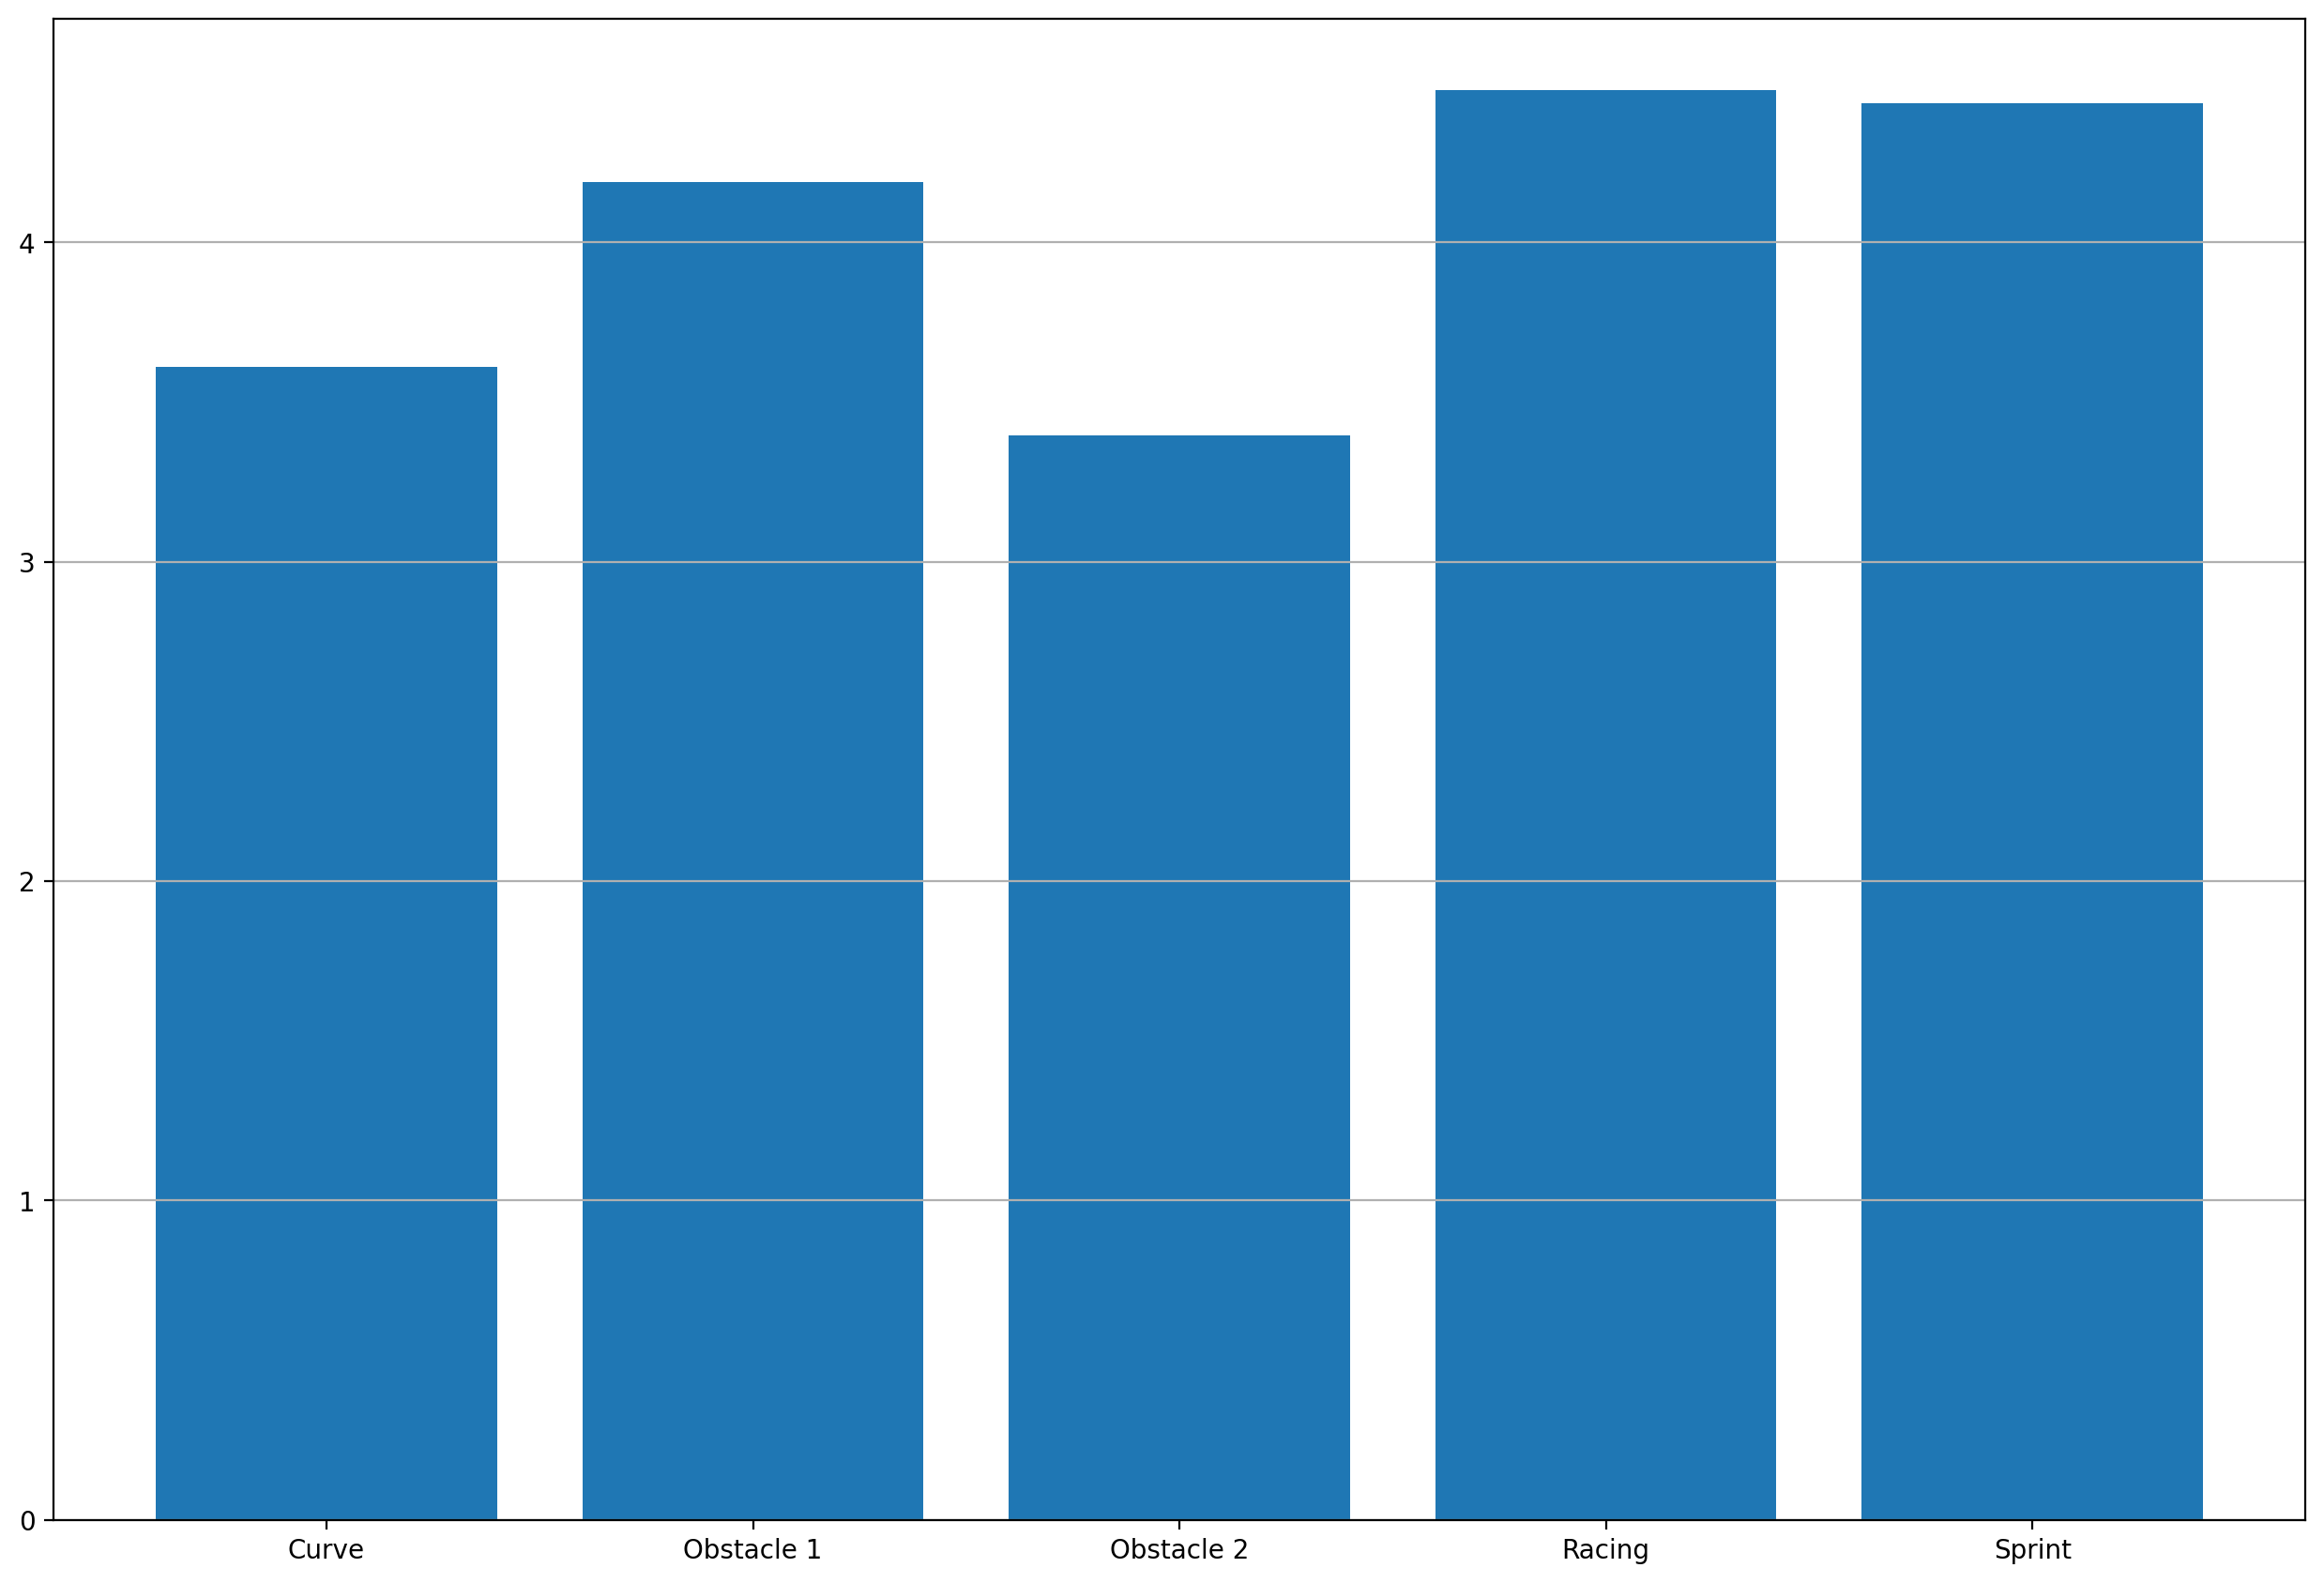

In [38]:
### all map && algos mean bar plot

mean_list = []
columns = ["Curve","Obstacle 1","Obstacle 2","Racing","Sprint"]

for i in [curve, obs1, obs2, racing, sprint]:
    _dfs = load_df(i)
    _means = mean_list_calc(_dfs)
    mean_list.append(mean_10_calc(_means))
    

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(columns, mean_list)

plt.grid(axis="y")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
plt.show()

In [36]:
### all map && algos mean bar plot

# pprint(mean_list)

# df = pandas.DataFrame(mean_list, columns=["Map","Name","Single", "LP", "GP"])

# df.plot(x="Name", y=["Single", "LP", "GP"], kind="bar",figsize=(9,8))
# # plt.grid()
# plt.rcParams['figure.figsize'] = [12, 8]
# plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
# plt.show()